In [43]:
# Import all needed libraries.

# pandas is essential data-analytics library
import pandas as pd 

# lifelines-tools needed for survival analysis

from lifelines import KaplanMeierFitter
from lifelines.utils import median_survival_times

# Shorten the KaplanMeierFitter-function

kmf = KaplanMeierFitter()

# matplolib needed for plotting

import matplotlib.pyplot as plt

# "When using the 'inline' backend, your matplotlib graphs will be included in your notebook, next to the code."
#  https://stackoverflow.com/questions/43027980/purpose-of-matplotlib-inline

%matplotlib inline

# Global settings for figure and label sizes

plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams['xtick.labelsize']=14
plt.rcParams['ytick.labelsize']=14

In [44]:
data = pd.read_csv(r"C:\Users\lehtojan\Desktop\churn\KSML_churn_modified.csv")

In [45]:
data.head()

,pa_cusno,pa_id,kayak_cusno,pa_gender,pa_marketing,papercode,campaign_number,campaign_name,start_date,stop_date,invoice_mode,invoice_value,subscription_kind,subs_name,receive_type,receive_value,package_type,marketing_ok,E,T
0,5675039,5e8ad7fe22e0bc9a99306430,5675039,M,No,ETSA,78,"TARJOUSKESTO 3 KK 60,- KE (78)",2019-08-15,2100-01-01,6,Sähköposti,1,Kestotilaus,8,Puhelinmyynti,DIGI-PAPER COMBO,No,0.0,29359
1,5770178,5abb990fa6720195b700c316,5770178,F,No,ETSA,78,"TARJOUSKESTO 3 KK 60,- KE (78)",2019-06-15,2019-08-06,1,Normaali,1,Kestotilaus,8,Puhelinmyynti,DIGI-PAPER COMBO,No,1.0,52
2,5695188,5c928e97ca96d6c6c8bbee84,5695188,M,No,ETSA,78,"TARJOUSKESTO 3 KK 60,- KE (78)",2019-06-08,2020-02-16,1,Normaali,1,Kestotilaus,8,Puhelinmyynti,DIGI-PAPER COMBO,No,1.0,253
3,5603362,5ab28e21996e5991fb0065e0,5603362,F,No,ETSA,78,"TARJOUSKESTO 3 KK 60,- KE (78)",2019-06-01,2019-08-31,1,Normaali,1,Kestotilaus,8,Puhelinmyynti,DIGI-PAPER COMBO,No,1.0,91
4,5555725,58e362b9bdf9281336015d7a,5555725,F,No,ETSA,78,"TARJOUSKESTO 3 KK 60,- KE (78)",2019-06-24,2100-01-01,1,Normaali,1,Kestotilaus,4,Internet,DIGI-PAPER COMBO,No,0.0,29411


In [46]:
# Create a variable of which paper you want the data to be about

paper = 'KE'

data = data.loc[data['papercode'] == paper]

In [47]:
data.to_csv(r'C:\Users\lehtojan\Desktop\churn\KSML_churn_'+paper+'.csv', index = False)

In [48]:
data = pd.read_csv(r'C:\Users\lehtojan\Desktop\churn\KSML_churn_'+paper+'.csv')

In [49]:
data.head()

,pa_cusno,pa_id,kayak_cusno,pa_gender,pa_marketing,papercode,campaign_number,campaign_name,start_date,stop_date,invoice_mode,invoice_value,subscription_kind,subs_name,receive_type,receive_value,package_type,marketing_ok,E,T
0,5062207,5d5e4f833694bfbcb6415d09,5062207,F,No,KE,153897,"MAKSUMUURI 1 KK 9,90 € 2018 (153897)",2019-08-23,2019-09-22,13,Luottokortti kesto/määrä-aikainen,2,Määräaikainen,99,PAYWAY,DIGITAL ONLY,No,1.0,30
1,4965904,5a1afcd21a35cee006000437,4965904,F,"email,direct,salesman,sms,customer_sales",KE,153897,"MAKSUMUURI 1 KK 9,90 € 2018 (153897)",2019-06-19,2019-07-18,1,Normaali,2,Määräaikainen,99,PAYWAY,DIGITAL ONLY,Yes,1.0,29
2,5037990,5c5090e165501da541c07719,5037990,M,No,KE,153897,"MAKSUMUURI 1 KK 9,90 € 2018 (153897)",2019-06-18,2019-07-17,1,Normaali,2,Määräaikainen,99,PAYWAY,DIGITAL ONLY,No,1.0,29
3,5056135,5cf5769fca96d6f9b0367832,5056135,F,No,KE,153897,"MAKSUMUURI 1 KK 9,90 € 2018 (153897)",2019-06-05,2019-07-04,1,Normaali,2,Määräaikainen,99,PAYWAY,DIGITAL ONLY,No,1.0,29
4,5011181,5b3ea30a22e0bccb3b003605,5011181,F,"direct,salesman,customer_sales",KE,153897,"MAKSUMUURI 1 KK 9,90 € 2018 (153897)",2019-08-09,2019-09-08,1,Normaali,2,Määräaikainen,99,PAYWAY,DIGITAL ONLY,Yes,1.0,30


In [50]:
# Count of subscribers by groups.

print('All subscribers:',data['pa_id'].count())
print()
print('Subscribers by', data.groupby('package_type')['pa_id'].count())
print()
print('Subscribers by', data.groupby('subs_name')['pa_id'].count())
print()
print('Subscribers by', data.groupby('papercode')['pa_id'].count())
print()
print('Subscribers by', data.groupby('pa_gender')['pa_id'].count())
print()
print('Subscribers by', data.groupby('invoice_value')['pa_id'].count())
print()
print('Subscribers by', data.groupby('receive_value')['pa_id'].count())
print()
print('Subscribers by', data.groupby('marketing_ok')['pa_id'].count())

All subscribers: 1285

Subscribers by package_type
DIGI-PAPER COMBO    497
DIGITAL ONLY        652
PAPER ONLY          136
Name: pa_id, dtype: int64

Subscribers by subs_name
Kestotilaus      502
Määräaikainen    783
Name: pa_id, dtype: int64

Subscribers by papercode
KE    1285
Name: pa_id, dtype: int64

Subscribers by pa_gender
      31
F    741
M    513
Name: pa_id, dtype: int64

Subscribers by invoice_value
E-lasku                              136
Luottokortti kesto/määrä-aikainen    105
Normaali                             861
Suoramaksu                             3
Sähköposti                           174
Verkkolasku (yritys)                   6
Name: pa_id, dtype: int64

Subscribers by receive_value
Internet                         97
Mobiili                           8
PAYWAY                          520
Puhelin                         104
Puhelinmyynti                   417
Sähköposti                       54
Tapahtumat ja messut             58
Tarjouskirje, esite, kuponki   

In [51]:
T = data['T']
E = data['E']

In [52]:
# KaplanMeierFitter, timeline to determine plot range. This starts from 0 days, ends at 400 days. 

kmf.fit(T, E, timeline=range(0,400,1))

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 1285 total observations, 333 right-censored observations>

Median for churn is: 91.0


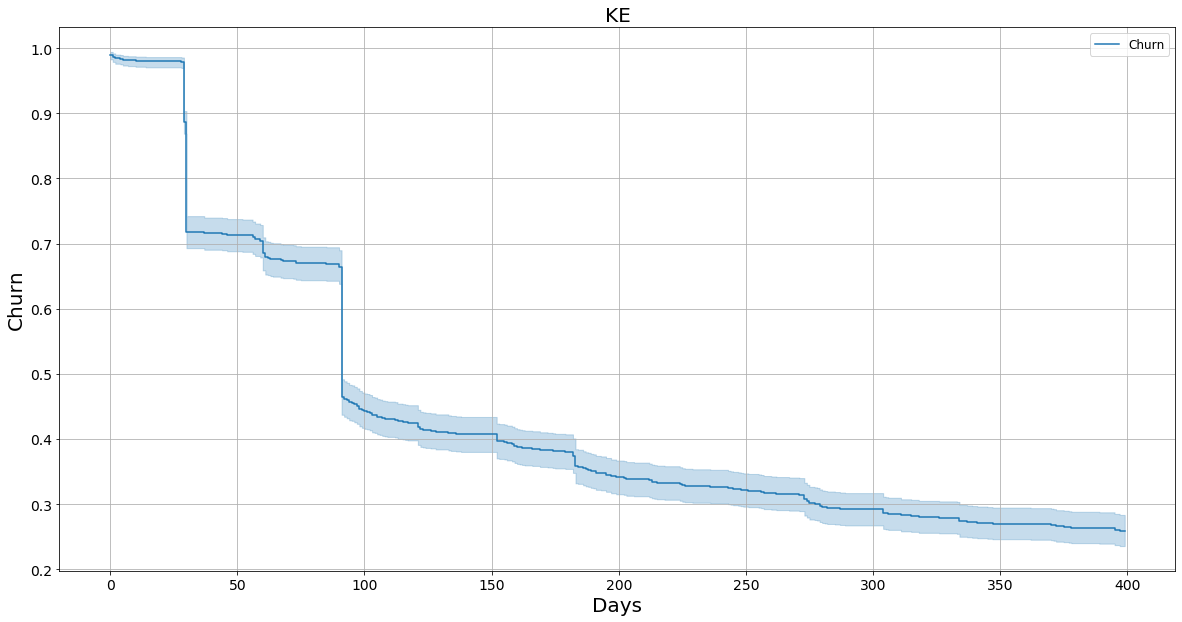

In [53]:
# Plotting the survival function for the paperwide data.

kmf.survival_function_
kmf.cumulative_density_

# Graphical parameters for the plot. Note that plot itself is ax variable.

ax1 = kmf.plot(label='Churn')

# Draws grid on the plot.

ax1.grid()

# Set y and x axes labels and font size

ax1.set_xlabel('Days', size = 20)
ax1.set_ylabel('Churn', size = 20)

# Set plot title and size

ax1.set_title(paper, size = 20)

# Legend location and fontsize

ax1.legend(loc='upper right', fontsize = 12)

# Save the generated plot to file

plt.savefig(r'C:\Users\lehtojan\Desktop\churn\churn_'+paper+'.png')

# Determining the median value for observed churn

median_ = kmf.median_survival_time_
median_confidence_interval_ = median_survival_times(kmf.confidence_interval_)

# Print out the median with the plot

print("Median for churn is:",median_)

Digital sub median: 30.0
Digi-paper sub median: 278.0
Paper sub median: 273.0


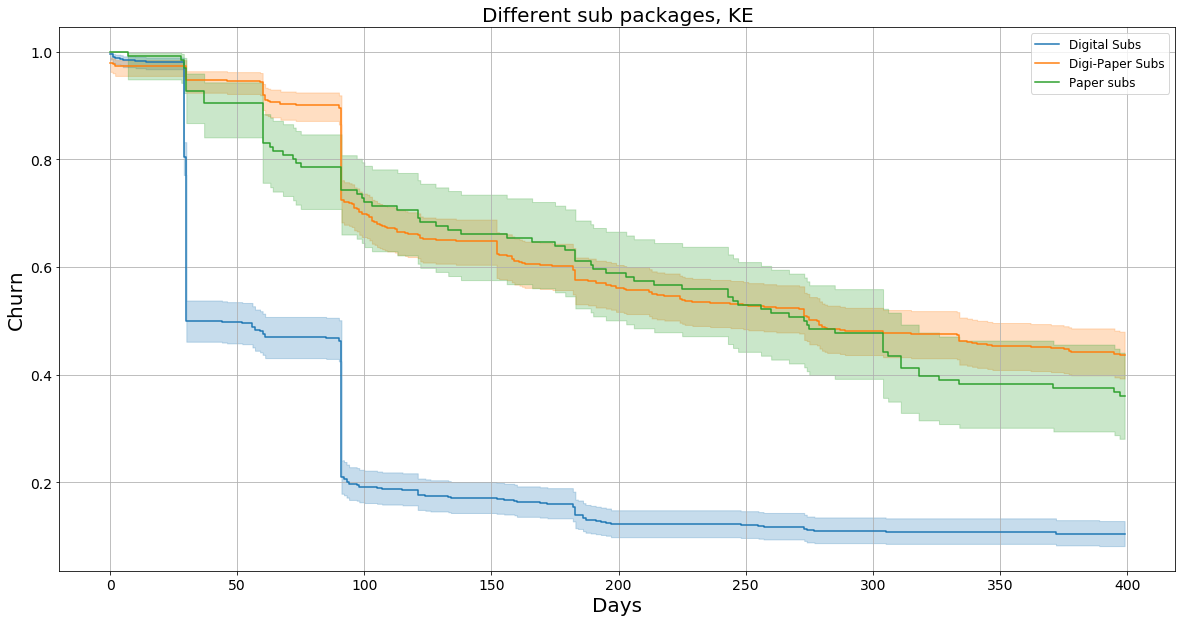

In [56]:
# Comparing different subscription packages.

# Plots subplot

ax = plt.subplot(111)

# Create variables for each value.

digi = (data["package_type"] == "DIGITAL ONLY")
digipap = (data["package_type"] == "DIGI-PAPER COMBO")
paper = (data["package_type"] == "PAPER ONLY")

# And fitting T and E variables to KaplanMeierFitter

kmf.fit(T[digi], event_observed=E[digi], label="Digital Subs", timeline=range(0,400,1))
kmf.plot(ax=ax)

# This calculates the median survival time. 

median_ = kmf.median_survival_time_
median_confidence_interval_ = median_survival_times(kmf.confidence_interval_)

# Print out the median value.

print('Digital sub median:',median_)

# Fitting the second variable.

kmf.fit(T[digipap], event_observed=E[digipap], label="Digi-Paper Subs", timeline=range(0,400,1))
kmf.plot(ax=ax)

# Median calculation.

median_ = kmf.median_survival_time_
median_confidence_interval_ = median_survival_times(kmf.confidence_interval_)

# And print.

print('Digi-paper sub median:',median_)

# Same for the third variable 'paper'

kmf.fit(T[paper], event_observed=E[paper], label="Paper subs", timeline=range(0,400,1))
kmf.plot(ax=ax)

median_ = kmf.median_survival_time_
median_confidence_interval_ = median_survival_times(kmf.confidence_interval_)

print('Paper sub median:',median_)

# Graphical values for plot.

ax.grid()
ax.set_xlabel('Days', size = 20)
ax.set_ylabel('Churn', size = 20)
ax.set_title('Different sub packages, KE', size = 20)
ax.legend(loc='upper right', fontsize = 12)

# Saves the figure as png

plt.savefig(r'C:\Users\lehtojan\Desktop\churn\churn_KE_packages.png')

Median is: 103.0


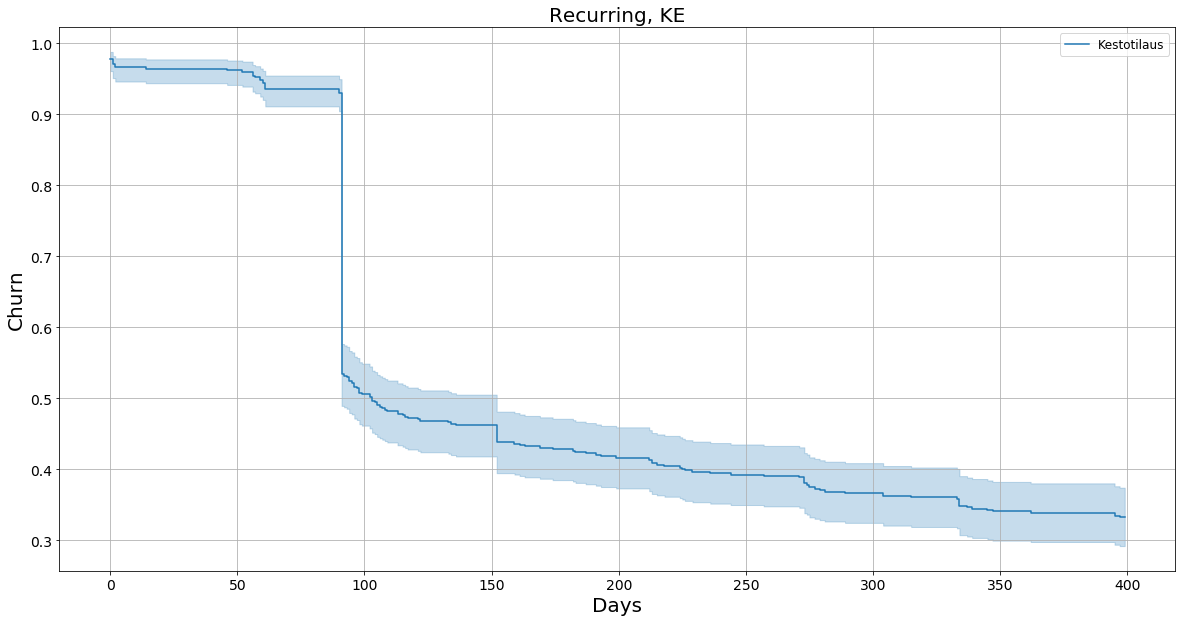

In [57]:
# Recurring subs for selected paper

ax = plt.subplot(111)

tilaus = (data["subs_name"] == "Kestotilaus")

kmf.fit(T[tilaus], event_observed=E[tilaus], label="Kestotilaus", timeline=range(0,400,1))
kmf.plot(ax=ax)

ax.grid()
ax.set_xlabel('Days', size = 20)
ax.set_ylabel('Churn', size = 20)
ax.set_title('Recurring, KE', size = 20)
ax.legend(loc='upper right', fontsize = 12)

median_ = kmf.median_survival_time_
median_confidence_interval_ = median_survival_times(kmf.confidence_interval_)

plt.savefig(r'C:\Users\lehtojan\Desktop\churn\churn_recurring_KE.png')

print('Median is:',median_)

Median is: 75.0


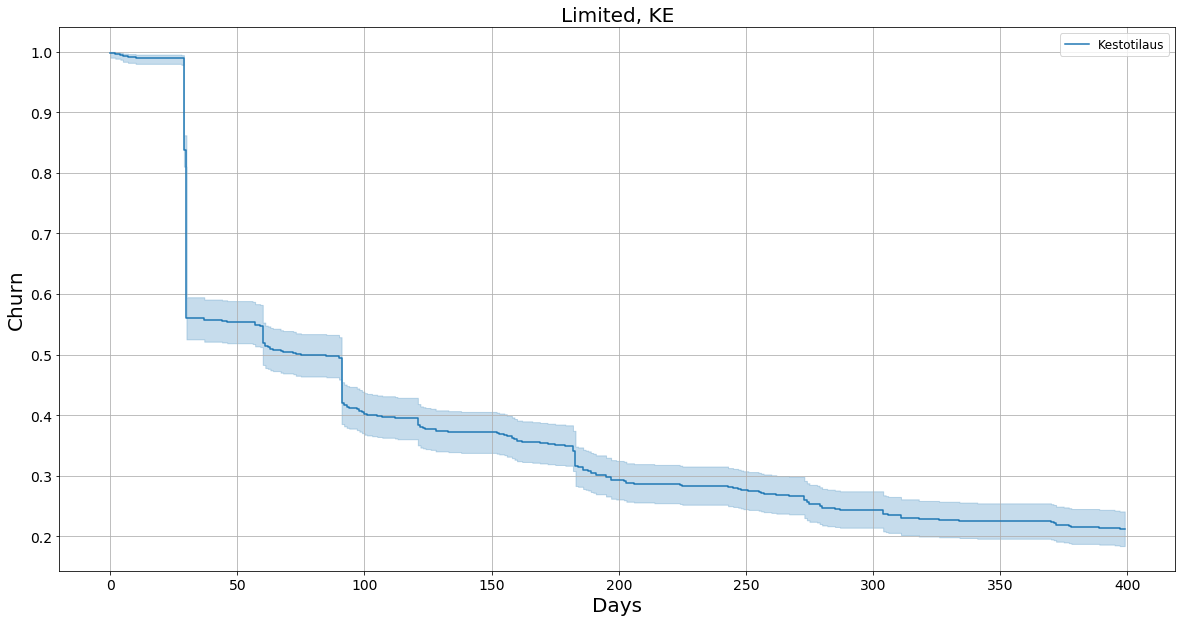

In [58]:
# Limited subs for selected paper

ax = plt.subplot(111)

tilaus = (data["subs_name"] == "Määräaikainen")

kmf.fit(T[tilaus], event_observed=E[tilaus], label="Kestotilaus", timeline=range(0,400,1))
kmf.plot(ax=ax)

ax.grid()
ax.set_xlabel('Days', size = 20)
ax.set_ylabel('Churn', size = 20)
ax.set_title('Limited, KE', size = 20)
ax.legend(loc='upper right', fontsize = 12)

median_ = kmf.median_survival_time_
median_confidence_interval_ = median_survival_times(kmf.confidence_interval_)

plt.savefig(r'C:\Users\lehtojan\Desktop\churn\churn_recurring_KE.png')

print('Median is:',median_)

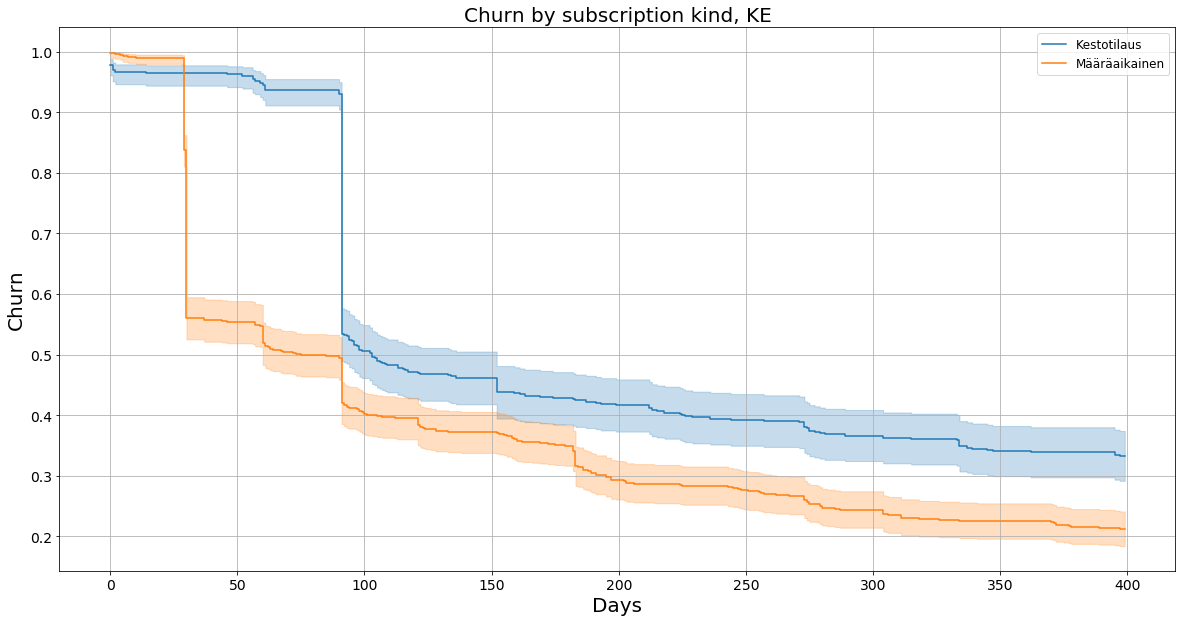

In [59]:
# Different kind of plotting. Here you can compare groups within columns.

ax = plt.subplot(111)

# This groups values from column.

for name, grouped_df in data.groupby('subs_name'):
    kmf.fit(grouped_df["T"], grouped_df["E"], label=name, timeline=range(0,400,1))
    kmf.plot(ax=ax)
    
ax.grid()
ax.set_xlabel('Days', size = 20)
ax.set_ylabel('Churn', size = 20)
ax.set_title('Churn by subscription kind, KE', size = 20)
ax.legend(fontsize = 12)

plt.savefig(r'C:\Users\lehtojan\Desktop\churn\churn_KE_subskind.png')

No marketing: 91.0
Marketing ok: 134.0


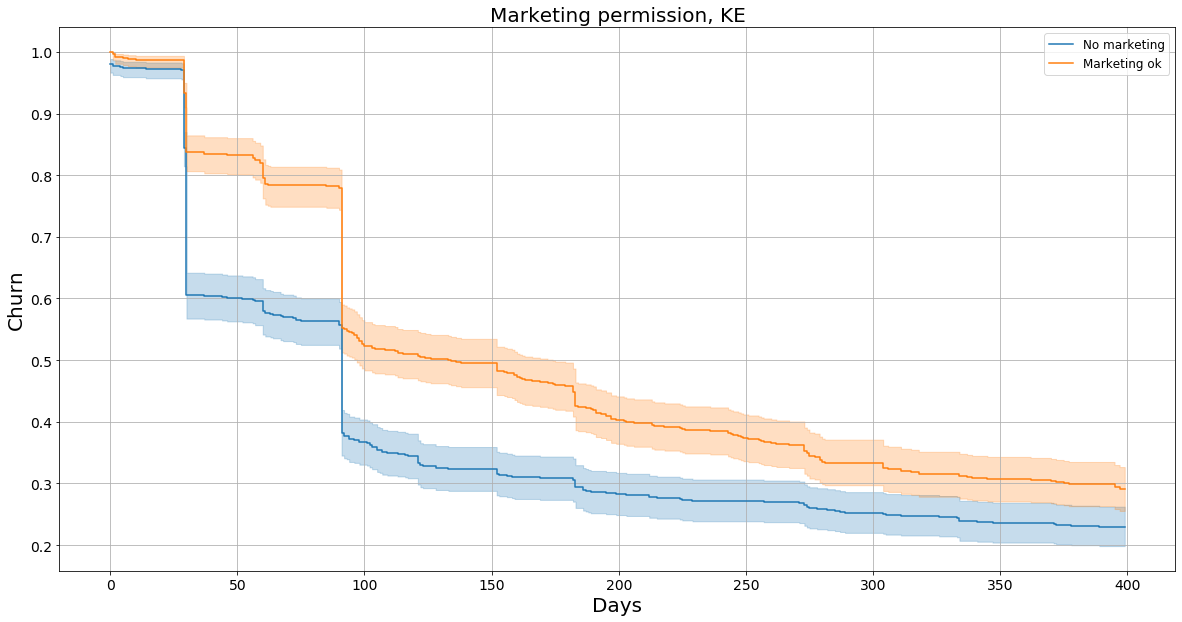

In [60]:
# Comparing if marketing permission has effect on churn. This is mostly the same as above cell, just with two variables.

ax = plt.subplot(111)

market_no = (data["marketing_ok"] == "No")
market_yes = (data["marketing_ok"] == "Yes")

kmf.fit(T[market_no], event_observed=E[market_no], label="No marketing", timeline=range(0,400,1))
kmf.plot(ax=ax)

median_ = kmf.median_survival_time_
median_confidence_interval_ = median_survival_times(kmf.confidence_interval_)

print('No marketing:',median_)

kmf.fit(T[market_yes], event_observed=E[market_yes], label="Marketing ok", timeline=range(0,400,1))
kmf.plot(ax=ax)

median_ = kmf.median_survival_time_
median_confidence_interval_ = median_survival_times(kmf.confidence_interval_)

print('Marketing ok:',median_)

ax.grid()
ax.set_xlabel('Days', size = 20)
ax.set_ylabel('Churn', size = 20)
ax.set_title('Marketing permission, KE', size = 20)
ax.legend(loc='upper right', fontsize = 12)

plt.savefig(r'C:\Users\lehtojan\Desktop\churn\churn_KE_marketing.png')

Median churn is 30.0 days


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\lehtojan\\Desktop\\churn\\churn_invoice_Luottokortti kesto/määrä-aikainen_KE.png'

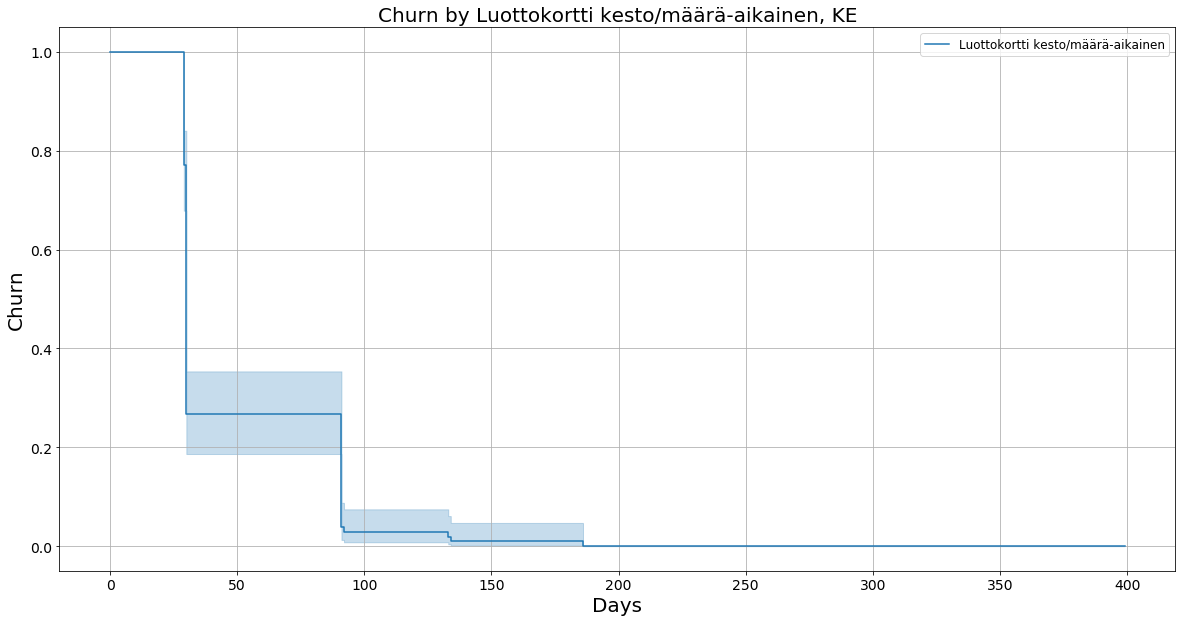

In [66]:
# Compare by invoice_value. Same as above cell, just variables changed.

invoice = 'Luottokortti kesto/määrä-aikainen'

ax = plt.subplot(111)

invtype = (data["invoice_value"] == invoice)

kmf.fit(T[invtype], event_observed=E[invtype], label=invoice, timeline=range(0,400,1))
kmf.plot(ax=ax)

ax.grid()
ax.set_xlabel('Days', size = 20)
ax.set_ylabel('Churn', size = 20)
ax.set_title('Churn by '+invoice+', KE', size = 20)
ax.legend(loc='upper right', fontsize = 12)

median_ = kmf.median_survival_time_
median_confidence_interval_ = median_survival_times(kmf.confidence_interval_)

print('Median churn is', median_,'days')

plt.savefig(r'C:\Users\lehtojan\Desktop\churn\churn_invoice_'+invoice+'_KE.png')

Median churn is inf days


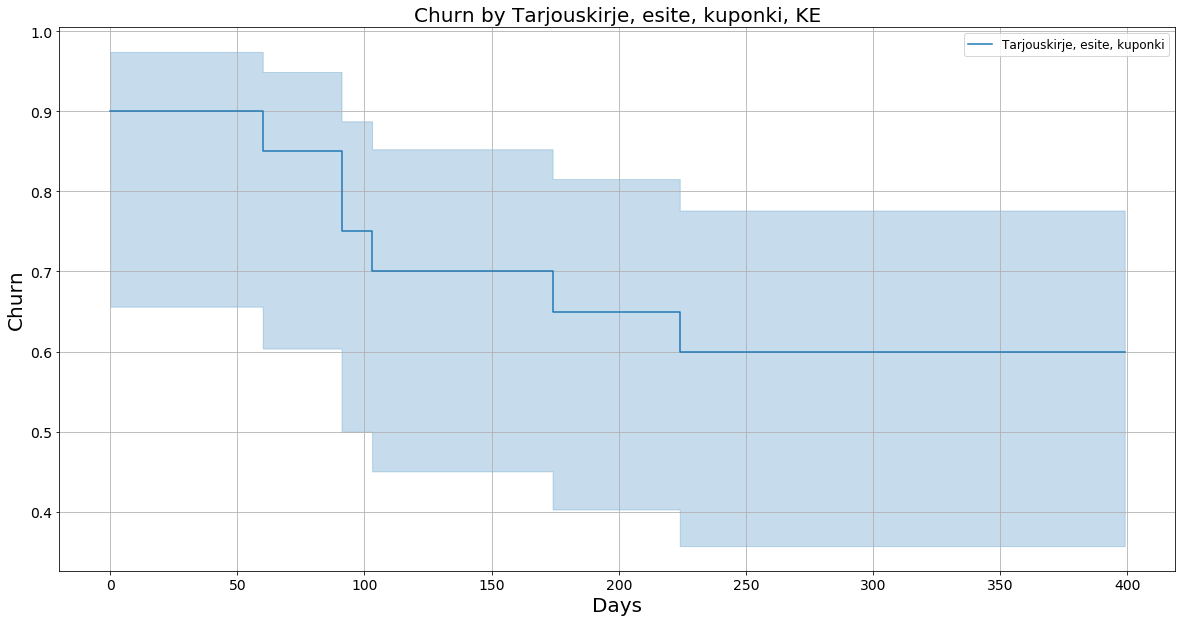

In [79]:
# Compare by receive_value. Same as above cell, just variables changed.

receive = 'Tarjouskirje, esite, kuponki'

ax = plt.subplot(111)

rectype = (data["receive_value"] == receive)

kmf.fit(T[rectype], event_observed=E[rectype], label=receive, timeline=range(0,400,1))
kmf.plot(ax=ax)

ax.grid()
ax.set_xlabel('Days', size = 20)
ax.set_ylabel('Churn', size = 20)
ax.set_title('Churn by '+receive+', KE', size = 20)
ax.legend(loc='upper right', fontsize = 12)

median_ = kmf.median_survival_time_
median_confidence_interval_ = median_survival_times(kmf.confidence_interval_)

print('Median churn is', median_,'days')

plt.savefig(r'C:\Users\lehtojan\Desktop\churn\churn_invoice_'+receive+'_KE.png')

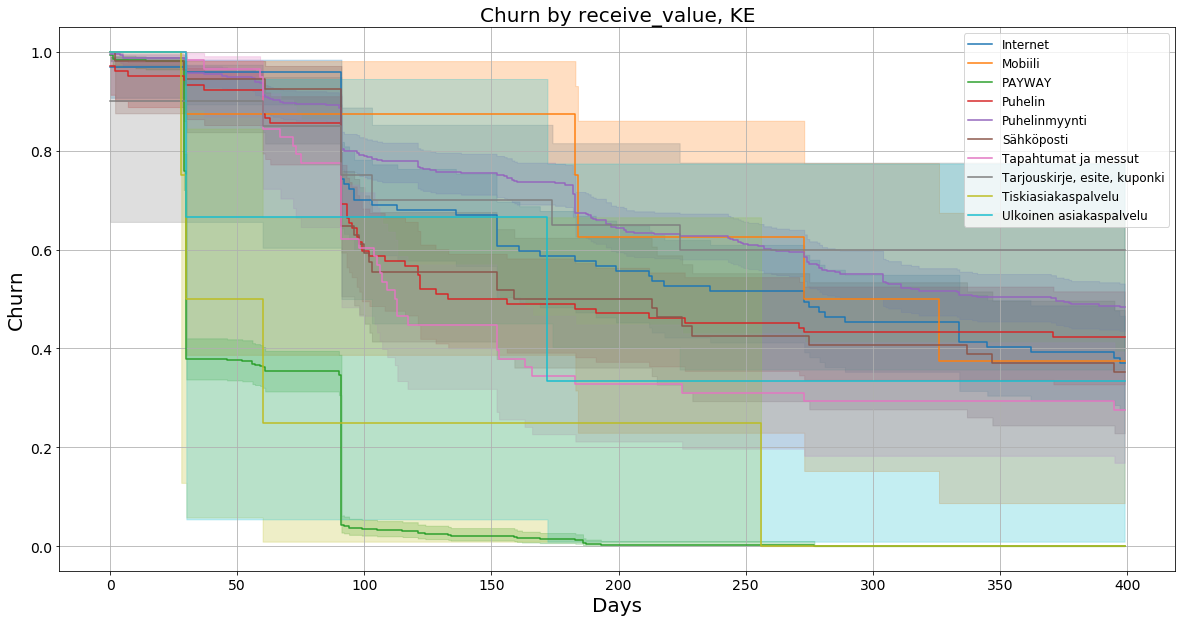

In [78]:
# Here you can compare churn in groups by changing the column name. All papers.

# Mostly the same as above cell, but here you just change the column-variable. No need to touch the code.
# Also, this saves the image with column name on it.

column = 'receive_value'

ax = plt.subplot(111)

for name, grouped_df in data.groupby(column):
    kmf.fit(grouped_df["T"], grouped_df["E"], label=name, timeline=range(0,400,1))
    kmf.plot(ax=ax)
    
ax.grid()
ax.set_xlabel('Days', size = 20)
ax.set_ylabel('Churn', size = 20)
ax.set_title('Churn by '+column+', KE' , size = 20)
ax.legend(fontsize = 12)

plt.savefig(r'C:\Users\lehtojan\Desktop\churn\churn_'+column+'_KE.png')